In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"? 

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***. 

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$). 

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [2]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations 
# of this multinomial random variable, and note it's relationship to `n`

array([2, 7, 0, 1])

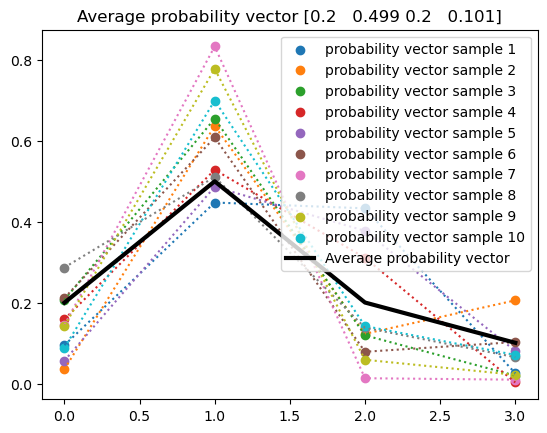

In [3]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector"); 
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

Over time, $\mathbf x^{(t)}$ would start with low counts for all chip brands when the store opens at 𝑡=0, then fluctuate based on factors like customer preferences and time of day. Popular brands might see spikes in purchases during peak hours, while counts decrease towards closing time.

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


The distribution $p(\mathbf p | \mathbf x^{(t)})$ represents the posterior distribution of the probability vector $p$ given the observed chip purchase counts $\mathbf x^{(t)}$ at time $t$, according to Bayesian analysis.

This distribution combines the prior belief about the probability vector $p$ (modeled by the Dirichlet distribution) with the likelihood of observing $\mathbf x^{(t)}$ given $p$. In simpler terms, it quantifies our updated belief about which chip brands are "the best" at time $t$ based on the observed purchases.

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$. 

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each. 

In [15]:
j=1
x = np.array([2, 5, 2, 1])
alpha = np.ones_like(x)
posterior_sample = np.random.dirichlet(alpha + x)
j = 1  
p_j_given_x = posterior_sample[j]

print("Sampled value of p_j given x=[2,5,2,1]:", p_j_given_x)

Sampled value of p_j given x=[2,5,2,1]: 0.46505560150617353


4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [16]:
# this can be done with for loops, or something like `...rvs(size=100000)[:,j]`

x = np.array([2, 5, 2, 1])
alpha = np.ones_like(x)
num_samples = 100000

posterior_samples = np.random.dirichlet(alpha + x, size=num_samples)

q = 0.5
count_p_j_gt_q = 0
j = 1  
for sample in posterior_samples:
    if sample[j] > q:
        count_p_j_gt_q += 1

prob_p_j_gt_q = count_p_j_gt_q / num_samples

print("Estimated Pr(p_j > q | x=[2,5,2,1]):", prob_p_j_gt_q)

Estimated Pr(p_j > q | x=[2,5,2,1]): 0.28953


5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$. 


In [17]:
lower_quantile = np.percentile(posterior_samples[:, j], 2.5)
upper_quantile = np.percentile(posterior_samples[:, j], 97.5)

print(f"Credible interval for p_{j} | x=[2,5,2,1]: [{lower_quantile}, {upper_quantile}]")

Credible interval for p_1 | x=[2,5,2,1]: [0.19270480931258938, 0.6849461780473916]


6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [18]:
count_p_j_gt_p_j_prime = 0
total_pairs = 0

for sample in posterior_samples:
    for j in range(len(x)):
        for j_prime in range(j + 1, len(x)):
            total_pairs += 1
            if sample[j] > sample[j_prime]:
                count_p_j_gt_p_j_prime += 1

prob_p_j_gt_p_j_prime = count_p_j_gt_p_j_prime / total_pairs

print("Estimated Pr(p_j > p_j' for j != j' | x=[2,5,2,1]):", prob_p_j_gt_p_j_prime)

Estimated Pr(p_j > p_j' for j != j' | x=[2,5,2,1]): 0.6358416666666666


7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [22]:
j = 0  
j_prime = 1 

ratios = posterior_samples[:, j] / posterior_samples[:, j_prime]

lower_quantile = np.percentile(ratios, 2.5)
upper_quantile = np.percentile(ratios, 97.5)

print("Credible interval for p_{}/p_{} | x=[2,5,2,1]: [{}, {}]".format(j, j_prime, lower_quantile, upper_quantile))

Credible interval for p_0/p_1 | x=[2,5,2,1]: [0.09355622760252498, 1.8786553444548155]


8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$. 

In [25]:
j = 0  
j_prime = 1  

differences = posterior_samples[:, j] - posterior_samples[:, j_prime]

lower_quantile = np.percentile(differences, 2.5)
upper_quantile = np.percentile(differences, 97.5)

print("Credible interval for p_{} - p_{} | x=[2,5,2,1]: [{}, {}]".format(j, j_prime, lower_quantile, upper_quantile))

Credible interval for p_0 - p_1 | x=[2,5,2,1]: [-0.5819327984133447, 0.19765294457616445]


9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


Both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$ and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ are relevant because they provide different perspectives on the relationships between the probabilities $ p_j $ and $ p_{j'} $ given the observed data $\mathbf x^{(t)}$.

For $( j, j') = (2, 3) $:
- $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$ represents the relative strength of preference or likelihood of one chip brand (brand $ j' $) being purchased over another (brand $ j $). In this case, it would indicate how much more likely it is for brand 3 to be purchased over brand 2.
- $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ represents the difference in probabilities between the two chip brands. This could indicate the magnitude of the preference or difference in popularity between the two brands. 

For \( (j, j') = (4, 5) \):
- $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$ would indicate the relative strength of preference or likelihood of one chip brand (brand $ j' $) being purchased over another (brand $ j $). In this case, it would indicate how much more likely it is for brand 5 to be purchased over brand 4.
- $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ would represent the difference in probabilities between the two chip brands. This could also indicate the magnitude of the preference or difference in popularity between the two brands.

The difference between these scenarios lies in the specific brands being compared. Different brands may have different levels of popularity or preference among customers, resulting in varying degrees of relevance for these two perspectives.

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining 
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$, then examining the distributions $p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$ would be particularly relevant when the purchases of chips \(4\) and \(5\) have noticeable variations from the expected probabilities.

Since $p_4 = 0.002$ and $p_5 = 0.001$, which are considerably smaller than the probabilities of the other chip brands, examining the joint probability $p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or the difference $p(p_4 - p_5|\mathbf{x}(t))$ would be meaningful when there is sufficient data to capture the rare occurrences of purchases for these less popular brands.

Thus, the time $t$ should be chosen when there are enough observations or trials to accurately estimate these probabilities and their relationships, ensuring that the analysis is based on reliable and representative data.